In [1]:
import ast , numpy as np     #讀進ast結構下的文字
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')  

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')
    

FileNotFoundError: [Errno 2] No such file or directory: 'train_data.txt'

In [2]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [3]:
# 建立model 
# the Sequential model
# the Model class used with the functional API.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten

# the Sequential model type I
model = Sequential()

model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                  input_shape=(28, 28, 1)
                 ) 
         )
model.add( Activation('relu')  )


model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                 ) 
         )
model.add( Activation('relu')  )

model.add( Conv2D(filters= 5, kernel_size=(2,2), 
                  strides=(1, 1), 
                  padding='same', 
                  #dilation_rate=2 , 
                 ) 
         )
model.add( Activation('relu')  )

model.add(Flatten())
model.add( Dense(32) )
model.add( Activation('relu')  )
model.add( Dense(3)  )
model.add( Activation('softmax')  ) 

model.summary()


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)             

In [5]:
# the Sequential model type II
# model = Sequential()
# model.add( Conv2D(filters= 10, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
# model.add( Flatten())
# model.add( Dense(32, activation='relu', input_dim=784) )
# model.add( Dense(3, activation='softmax') )
# model.summary()

In [6]:
# the Sequential model type III
# model = Sequential([
#                     Conv2D(filters= 10, kernel_size=(2,2), padding='same', input_shape=(28, 28, 1)), 
#                     Activation('relu'),
    
#                     Flatten(),
    
#                     Dense(32), 
#                     Activation('relu'),
    
#                     Dense(3),  
#                     Activation('softmax'),
#                    ])
# model.summary()

In [7]:
# the Model class used with the functional API.
# from keras.models import Model
# from keras.layers import Input, Dense , ReLU, Softmax, Conv2D, Flatten

# a = Input(shape=(28, 28, 1))

# dense = Conv2D(filters= 10, kernel_size=(2,2), padding='same')(a)
# dense = ReLU()(dense)

# dense = Flatten()(dense)

# dense = Dense(32)(dense)
# dense = ReLU()(dense)

# dense = Dense(3)(dense)
# b     = Softmax()(dense)


# model = Model(inputs=a, outputs=b)
# model.summary()

In [8]:
# 編譯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, batch_size=10, epochs=5, verbose=1)

Epoch 1/5
50/50 [==============================] - 2s 37ms/step - loss: 0.9028 - accuracy: 0.5200
Epoch 2/5
50/50 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.9400
Epoch 3/5
50/50 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9600
Epoch 4/5
50/50 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9200
Epoch 5/5
50/50 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9600


In [9]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 0s 9ms/step


98.00000190734863

In [22]:
# filters 來產生新圖像
weights = []
for i,m in enumerate(model.layers):
    if type(m) == Conv2D :
        weights.append( m.get_weights() )
        print('filters ', m.filters)
len(weights)
# 表示有兩段 CONV2D

filters  5
filters  5
filters  5


3

In [11]:
# 十張  CNN 圖片     # 0 ... 9
for w in weights:
    print(w[0][:, :, 0  , 0])

[[-0.31719252  0.02143441]
 [-0.3006328  -0.02940845]]
[[-0.08778995 -0.33910093]
 [-0.13814105  0.13757639]]
[[ 0.01174804 -0.08733776]
 [-0.05897813  0.05284974]]


In [12]:
def conv_kernel(kernel, img):
    height, width = img.shape[0]//kernel.shape[0], img.shape[1]//kernel.shape[1]
    conv = np.zeros((height, width))
    for ii in range(height):
        for jj in range(width):
            val = np.sum(kernel * img[ii*kernel.shape[0]:ii*kernel.shape[0]+kernel.shape[0], 
                                      jj*kernel.shape[1]:jj*kernel.shape[1]+kernel.shape[1]])
            conv[ii, jj] = val
    
    return(conv)

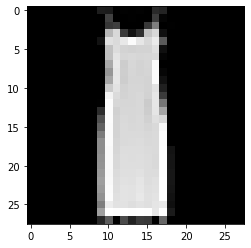

In [13]:
# 原始圖片
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow( train_data[0, :, :, :].reshape(28, 28) , cmap='gray' )
plt.show()

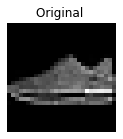

Con2D Layer 0


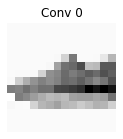

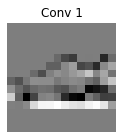

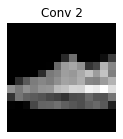

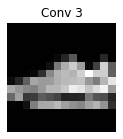

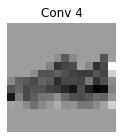

--------------------------------------------------
Con2D Layer 1


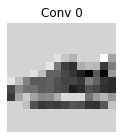

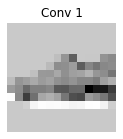

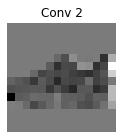

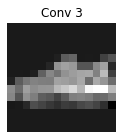

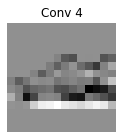

--------------------------------------------------
Con2D Layer 2


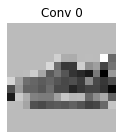

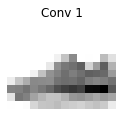

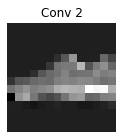

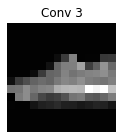

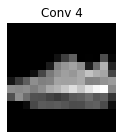

--------------------------------------------------


In [17]:
#                     filter = 0

clothes = 4

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow( train_data[clothes, :, :, :].reshape(28, 28) , cmap='gray' )
plt.title('Original ')
plt.axis('off')
plt.show()
for i, w in enumerate(weights):
    print('Con2D Layer', str(i))
    for i in range(5): # 唯一沒有修改 **********
        kernel = w[0][:, :, 0  , i]
        img = train_data[clothes, :, :, :].reshape(28, 28)  # 針對指定影像處理
        img_filter = conv_kernel( kernel,  img)
        plt.figure(figsize=(2,2))
        plt.imshow( img_filter, cmap='gray' )
        plt.title('Conv '+ str(i))
        plt.axis('off')
        plt.show()
    print('-'*50)